# Check effect of water stress for Valais must samples

In [1]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/valais

In [2]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/valais'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/valais


In [3]:
%env TMPDIR=/scratch/lfloerl/tmpdata

env: TMPDIR=/scratch/lfloerl/tmpdata


In [4]:
from qiime2 import Visualization
import qiime2 as q2
from qiime2 import Visualization
from qiime2 import Artifact
from qiime2 import Metadata
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qiime2.plugins.diversity.visualizers import alpha_group_significance


from qiime2.plugins import diversity as q2d

%matplotlib inline

In [5]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv')
taxonomy = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/taxonomy.qza')

## Filter

In [8]:
%%bash 

# subset to samples with water stress samples 
qiime feature-table filter-samples \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/phylum_filtered_table.qza \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
    --p-where "[Water_Stress] IS NOT NULL" \
    --o-filtered-table valais_water_stress_table.qza

qiime feature-table summarize --i-table valais_water_stress_table.qza --o-visualization valais_water_stress_table.qzv

qiime feature-table filter-seqs \
    --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
    --i-table valais_water_stress_table.qza \
    --o-filtered-data valais_water_stress_rep_seqs.qza

Saved FeatureTable[Frequency] to: valais_water_stress_table.qza
Saved Visualization to: valais_water_stress_table.qzv
Saved FeatureData[Sequence] to: valais_water_stress_rep_seqs.qza


In [11]:
table = q2.Artifact.load('valais_water_stress_table.qza')

## Rarefaction 

In [10]:
Visualization.load('valais_water_stress_table.qzv')

<visualization: Visualization uuid: 04c2788c-0104-4bea-8186-2a946fe9e842>

In [12]:
alpha_rarefaction, = q2d.visualizers.alpha_rarefaction(table=table, 
                                                       max_depth=15000,
                                                       metadata=md)
alpha_rarefaction.save('alpha_rarefaction_curves.qzv')

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan na

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_diversity/_alpha/_visualizer.py:265: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked_counts = counts.stack(level=0)
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_diversity/_alpha/_visualizer.py:260: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  summary_df = data.stack(level=0)
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_diversity/_alpha/_visualizer.py:265: FutureWarning: The previous implementation of sta

'alpha_rarefaction_curves.qzv'

In [13]:
Visualization.load('alpha_rarefaction_curves.qzv')

<visualization: Visualization uuid: bd470128-852a-4938-8ae0-736675254f38>

## Diversity

In [6]:
depth = 8000 
threads = 5

In [7]:
table = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/valais_water_stress_table.qza')

core_div_dict = {}
core_div = q2d.actions.core_metrics(table=table,
                                    sampling_depth=depth,
                                    metadata=md, 
                                    n_jobs=threads)
# save outputs
output_dir='valais_water_stress_cm{0}/'.format(depth)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for k, v in core_div.__dict__.items():
    if k != '_fields':
        v.save(output_dir + k)
        core_div_dict[k] = v

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan na

In [21]:
Visualization.load(f'{workdir}/{output_dir}/bray_curtis_emperor.qzv')

<visualization: Visualization uuid: 35d9dd9b-532f-4ec1-8669-f65fb47e7764>

In [22]:
Visualization.load(f'{workdir}/{output_dir}/jaccard_emperor.qzv')

<visualization: Visualization uuid: c2190aea-c97d-4e68-b537-0c678c063134>

## Nicer Plots

In [24]:
!qiime tools export --input-path valais_water_stress_cm8000/jaccard_pcoa_results.qza --output-path valais_water_stress_cm8000/jaccard_pcoa
!qiime tools export --input-path valais_water_stress_cm8000/bray_curtis_pcoa_results.qza --output-path valais_water_stress_cm8000/bray_curtis_pcoa


# reimport 
bc_pcoa = pd.read_csv('valais_water_stress_cm8000/bray_curtis_pcoa/ordination.txt', sep='\t', skiprows=9, header=None)
jaccard_pcoa = pd.read_csv('valais_water_stress_cm8000/jaccard_pcoa/ordination.txt', sep='\t', skiprows=9, header=None)

# function to get components 
def select_components(df):
    # Drop the last 2 rows
    df = df.iloc[:-2]
    # Select specific columns
    df = df.iloc[:, [0, 1, 2]]
    # Rename columns and set index
    df = df.rename(columns={0: 'ID', 1: 'PC1', 2: 'PC2'}).set_index('ID')
    return df

bc_pcoa_df = select_components(bc_pcoa)
jaccard_pcoa_df = select_components(jaccard_pcoa)

Exported valais_water_stress_cm8000/jaccard_pcoa_results.qza as OrdinationDirectoryFormat to directory valais_water_stress_cm8000/jaccard_pcoa
Exported valais_water_stress_cm8000/bray_curtis_pcoa_results.qza as OrdinationDirectoryFormat to directory valais_water_stress_cm8000/bray_curtis_pcoa


In [40]:
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv', sep='\t', index_col=0)

# merge with metadata
bc_pcoa_df_merged = bc_pcoa_df.merge(md, left_on='ID', right_on='id', how='left')
jaccard_pcoa_df_merged = jaccard_pcoa_df.merge(md, left_on='ID', right_on='id', how='left')

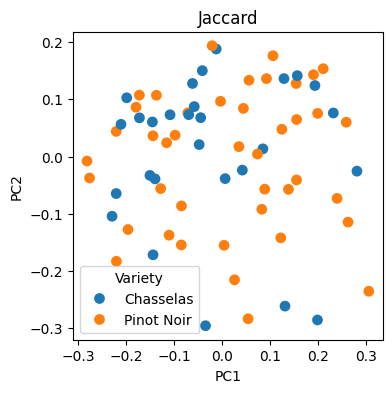

In [39]:
plt.figure(figsize=(4, 4)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=jaccard_pcoa_df_merged,
    hue='Variety',
    s=60,edgecolor='none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Jaccard')

plt.show()

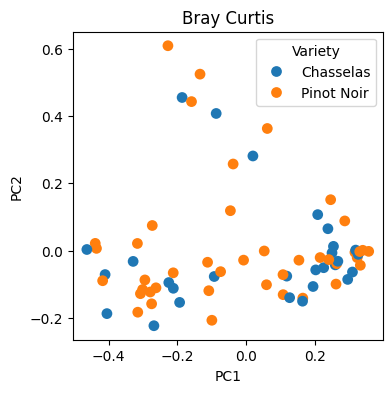

In [41]:
plt.figure(figsize=(4, 4)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=bc_pcoa_df_merged,
    hue='Variety',
    s=60,edgecolor='none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Bray Curtis')

plt.show()

## Kmerizer 

In [29]:
#!rm -r kmer-core-metrics

In [42]:
%%bash

qiime kmerizer core-metrics \
    --i-sequences valais_water_stress_rep_seqs.qza \
    --i-table valais_water_stress_table.qza \
    --p-sampling-depth 8000 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
    --p-n-jobs 'auto' \
    --p-max-features 5000 \
    --output-dir valais_water_stress_kmer_cm8000/

Saved FeatureTable[Frequency] to: valais_water_stress_kmer_cm8000/rarefied_table.qza
Saved FeatureTable[Frequency] to: valais_water_stress_kmer_cm8000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: valais_water_stress_kmer_cm8000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: valais_water_stress_kmer_cm8000/shannon_vector.qza
Saved DistanceMatrix to: valais_water_stress_kmer_cm8000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: valais_water_stress_kmer_cm8000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: valais_water_stress_kmer_cm8000/jaccard_pcoa_results.qza
Saved PCoAResults to: valais_water_stress_kmer_cm8000/bray_curtis_pcoa_results.qza
Saved Visualization to: valais_water_stress_kmer_cm8000/scatterplot.qzv


In [75]:
Visualization.load('valais_water_stress_kmer_cm5000/scatterplot.qzv')

<visualization: Visualization uuid: 9102663a-9b7d-4dd3-bd6e-8b796ba9beb8>

In [43]:
!qiime tools export --input-path valais_water_stress_kmer_cm8000/jaccard_pcoa_results.qza --output-path valais_water_stress_kmer_cm8000/jaccard_pcoa
!qiime tools export --input-path valais_water_stress_kmer_cm8000/bray_curtis_pcoa_results.qza --output-path valais_water_stress_kmer_cm8000/bray_curtis_pcoa


# reimport 
bc_pcoa = pd.read_csv('valais_water_stress_kmer_cm8000/bray_curtis_pcoa/ordination.txt', sep='\t', skiprows=9, header=None)
jaccard_pcoa = pd.read_csv('valais_water_stress_kmer_cm8000/jaccard_pcoa/ordination.txt', sep='\t', skiprows=9, header=None)

# function to get components 
def select_components(df):
    # Drop the last 2 rows
    df = df.iloc[:-2]
    # Select specific columns
    df = df.iloc[:, [0, 1, 2]]
    # Rename columns and set index
    df = df.rename(columns={0: 'ID', 1: 'PC1', 2: 'PC2'}).set_index('ID')
    return df

bc_pcoa_df = select_components(bc_pcoa)
jaccard_pcoa_df = select_components(jaccard_pcoa)

Exported valais_water_stress_kmer_cm8000/jaccard_pcoa_results.qza as OrdinationDirectoryFormat to directory valais_water_stress_kmer_cm8000/jaccard_pcoa
Exported valais_water_stress_kmer_cm8000/bray_curtis_pcoa_results.qza as OrdinationDirectoryFormat to directory valais_water_stress_kmer_cm8000/bray_curtis_pcoa


In [44]:
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv', sep='\t', index_col=0)

# merge with metadata
bc_pcoa_df_merged = bc_pcoa_df.merge(md, left_on='ID', right_on='id', how='left')
jaccard_pcoa_df_merged = jaccard_pcoa_df.merge(md, left_on='ID', right_on='id', how='left')

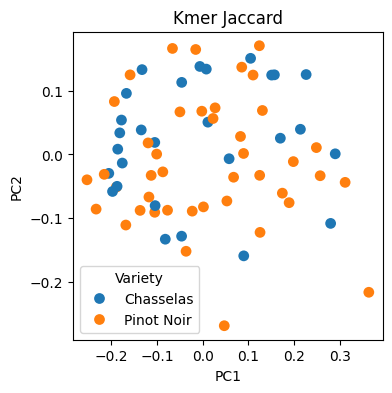

In [45]:
plt.figure(figsize=(4, 4)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=jaccard_pcoa_df_merged,
    hue='Variety',
    s=60,edgecolor='none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kmer Jaccard')

plt.show()

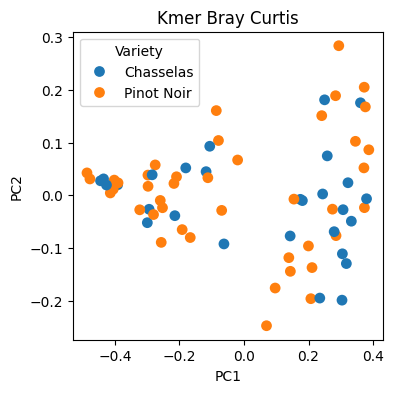

In [46]:
plt.figure(figsize=(4, 4)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=bc_pcoa_df_merged,
    hue='Variety',
    s=60,edgecolor='none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kmer Bray Curtis')

plt.show()

# PERMANOVA

In [13]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv')

#formula = 'Location + Variety + Water_Stress + Soil_type * Soil_depth * Precipitation'
#formula = 'Location * Variety * Water_Stress'
formula = 'Variety + Precipitation + Water_Stress'
# removed interaction because not significant 

beta_metrics = ['bray_curtis', 'jaccard']

# PERMANOVA with core metrics 
for m in beta_metrics:
    adonis_res, = q2d.actions.adonis(
        distance_matrix=core_div_dict[m + '_distance_matrix'],
        metadata=md,
        formula=formula,
        n_jobs=3)
    adonis_res.save(output_dir + 'adonis_{0}.qzv'.format(m))
    

# PERMANOVA with kmer core metrics 
kmer_dir = 'valais_water_stress_kmer_cm8000'
    
for m in beta_metrics:
    !qiime diversity adonis \
        --i-distance-matrix "{kmer_dir}/{m}_distance_matrix.qza" \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
        --p-formula "{formula}" \
        --p-n-jobs 5 \
        --o-visualization "{kmer_dir}/adonis_{m}.qzv"

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan na

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmpag6_0vdn/dm.tsv /scratch/lfloerl/tmpdata/tmpag6_0vdn/md.tsv Precipitation + Water_Stress + Variety 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-zavioput/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an er

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmpvv_g4ckh/dm.tsv /scratch/lfloerl/tmpdata/tmpvv_g4ckh/md.tsv Precipitation + Water_Stress + Variety 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-wiz5jy39/adonis.tsv

R version 4.3.3 (2024-02-29) 


This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Saved Visualization to: valais_water_stress_kmer_cm8000/adonis_bray_curtis.qzv
Saved Visualization to: valais_water_stress_kmer_cm8000/adonis_jaccard.qzv


In [14]:
Visualization.load(f'{output_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: cef9939b-329d-4345-8424-3aa72fbbb748>

In [15]:
Visualization.load(f'{output_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: 4457498c-6a23-4125-8023-550d6c6c637b>

In [16]:
Visualization.load(f'{kmer_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: 4ae10b01-de58-4c09-95b8-9d6b3c288c67>

In [17]:
Visualization.load(f'{kmer_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: 02a554a8-2079-4832-87a1-7a5d4c602619>

## Regress Samples

In [55]:
%%bash 

qiime sample-classifier regress-samples \
        --i-table valais_water_stress_table.qza \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
        --m-metadata-column "Water_Stress" \
        --p-n-jobs 10 \
        --output-dir Water_stress_regression 

Saved SampleEstimator[Regressor] to: Water_stress_regression/sample_estimator.qza
Saved FeatureData[Importance] to: Water_stress_regression/feature_importance.qza
Saved SampleData[RegressorPredictions] to: Water_stress_regression/predictions.qza
Saved Visualization to: Water_stress_regression/model_summary.qzv
Saved Visualization to: Water_stress_regression/accuracy_results.qzv


In [56]:
Visualization.load('Water_stress_regression/accuracy_results.qzv')

<visualization: Visualization uuid: b97ba8de-461b-410c-a1f8-c6a00e996c73>

In [57]:
# metrics: 
alpha_metrics = ['shannon_vector', 'observed_features_vector', 'evenness_vector']

for m in alpha_metrics:
    ags, = alpha_group_significance(alpha_diversity = core_div_dict[m],
                               metadata = md)
    ags.save(output_dir + 'alpha_groupSig_{0}.qzv'.format(m))

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-

In [58]:
Visualization.load(f'{output_dir}/alpha_groupSig_evenness_vector.qzv')

<visualization: Visualization uuid: 304ea72b-9072-4a07-a2db-ddf9daf149b6>

In [59]:
Visualization.load(f'{output_dir}/alpha_groupSig_observed_features_vector.qzv')

<visualization: Visualization uuid: 1fa17c9f-b381-45fc-b592-18dd673a45a1>

In [60]:
Visualization.load(f'{output_dir}/alpha_groupSig_shannon_vector.qzv')

<visualization: Visualization uuid: 47284247-8837-4233-9b92-338f94764f6b>